
# Storytelling Data Visualization on Exchange Rates


The aim of this project is to create storytelling data visualization using the following work flow:

* To start by exploring and cleaning the data.
* To brainstorm ideas for storytelling data visualizations and chose one.
* To sketch our data visualization using pen and paper.
* To code the sketched data visualization.

Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar. 

## 1. Introducing the Dataset

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The Euro (symbolized with €) is the official currency in most of the countries of the European Union. Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

First, we'll read in the euro-daily-hist_1999_2020.csv file into a pandas DataFrame. Then we'll inspect the dataset.

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [16]:
path ="euro-daily-hist_1999_2020.csv"
exchange_rates = pd.read_csv(path, low_memory=False)

nRow, nCol = exchange_rates.shape
print(f'Detailed Listting has {nRow} rows and {nCol} columns')

Detailed Listting has 5699 rows and 41 columns


In [17]:
exchange_rates.head(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [18]:
exchange_rates.tail(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [19]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [20]:
def missing_data(df):
    '''
        Calculates missing value for a dataframe
        arguments:
            df: the dataframe for which missing values need to be calculated.
        returns: 
            a dataframe containing number and percentage of missing values, and data type per column that is larger than 0
    '''
    total = df.isnull().sum().sort_values(ascending=False)
    percent = total*100/df.isnull().count()
    missing_data = pd.concat([total,percent],axis=1,keys=['Total', 'Percent'])
    
    s_dtype = pd.Series(df.dtypes, name="dtypes")
    df_dtype =s_dtype.to_frame()    
    missing_data = missing_data.merge(df_dtype, how='left', left_index=True, right_index=True)

    return missing_data

num_missing = missing_data(exchange_rates)
num_missing[num_missing['Total']>0]  

,Total,Percent,dtypes
[Greek drachma ],5179,90.875592,object
[Slovenian tolar ],3614,63.414634,object
[Cypriot pound ],3353,58.834883,object
[Maltese lira ],3353,58.834883,object
[Slovak koruna ],3091,54.237586,object
[Estonian kroon ],2569,45.078084,object
[Iceland krona ],2407,42.235480,float64
[Latvian lats ],1795,31.496754,object
[Lithuanian litas ],1540,27.022285,object
[Bulgarian lev ],402,7.053869,object


## 2. Data Cleaning

Shown above are the columns that contain null values. Before we start creating data visualizations, we'll need to do a bit of data cleaning. Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar. 

Below, we do the following:

* We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
* We change the Time column to a datetime data type.
* We sort the values by Time in ascending order.
* We reset the index (and drop the initial index).
* Isolate the Time and the US_dollar columns. 
* Run the Series.value_counts() method on the US_dollar column

In [21]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                      'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
euro_to_dollar = exchange_rates[['Time','US_dollar']]
euro_to_dollar ['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
0.9425     1
1.1032     1
1.2179     1
0.8701     1
0.8654     1
Name: US_dollar, Length: 3528, dtype: int64

The '-' character appears in the US_dollar column. 

We will Drop all the rows where the "-" character appears in the US_dollar column, and convert the column to float

In [22]:
euro_to_dollar =euro_to_dollar [euro_to_dollar['US_dollar'] != "-"]
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float64')

## 3. Rolling Mean

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

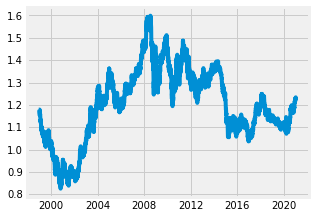

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4.5,3.5))
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.show()

In the above plot, we see many small wiggle, which represente the daily variation in the exchange rate. To hide it and show only the long-term trends, we can use the rolling mean. We can calculate the mean for each day using the <strong> pandas.Series.rolling().mean()</strong> method 

We will calculate the rolling means for the US_dollar column using a moving window of 7, 30, 50,100 and 365 days, then add the rolling means to new column named rolling_mean_7, rolling_mean_30. 

We will use grid charts with 6 line plot to show the origianl vaules US_dollar  and all the rolling means. We will see how our line plot changes visually as we increase the rolling window. The window gets larger, and the line becomes smoother. This increases the data-ink ratio, and it can be useful if we want the audience to focus only on long-term trends.

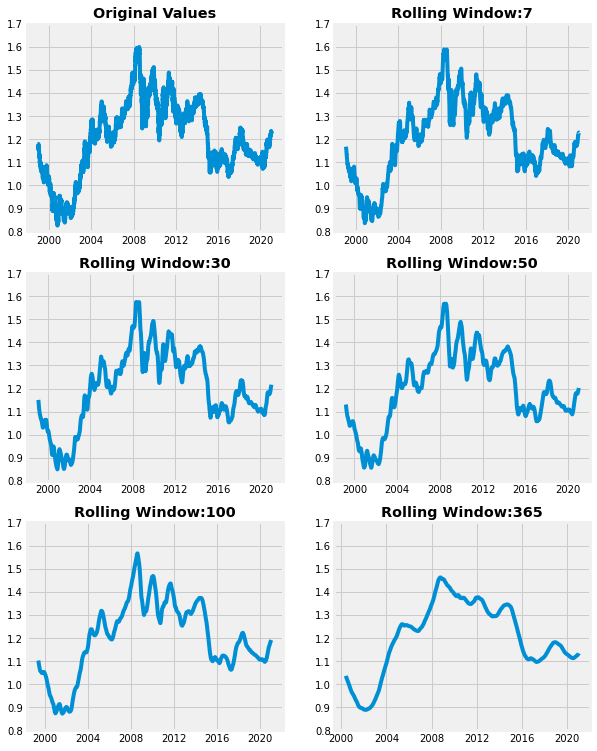

In [24]:
plt.figure(figsize=(9,13))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.title("Original Values",weight='bold')
plt.ylim([0.8,1.7])

for i, rolling_mean_days in zip([2,3,4,5,6], [7,30,50,100,365]):
    col = 'rolling_mean_'+ str(rolling_mean_days)
    euro_to_dollar[col] = euro_to_dollar['US_dollar'].rolling(rolling_mean_days).mean()
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'],euro_to_dollar[col])
    plt.title(("Rolling Window:" + str(rolling_mean_days)),weight='bold')
    plt.ylim([0.8,1.7])

plt.show() 

In [25]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              5637 non-null   datetime64[ns]
 1   US_dollar         5637 non-null   float64       
 2   rolling_mean_7    5631 non-null   float64       
 3   rolling_mean_30   5608 non-null   float64       
 4   rolling_mean_50   5588 non-null   float64       
 5   rolling_mean_100  5538 non-null   float64       
 6   rolling_mean_365  5273 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 352.3 KB


##  4. Coming up with an Idea
 
Our goal is to create a storytelling data visualization using the data we have. Here are <b>three</b> story ideas for our data:

1. We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
2. We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.
3. We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

## 5. Storytelling Data Visualization

### Data Story 1:  How the euro-dollar rate changed during the 2007-2008 financial crisis

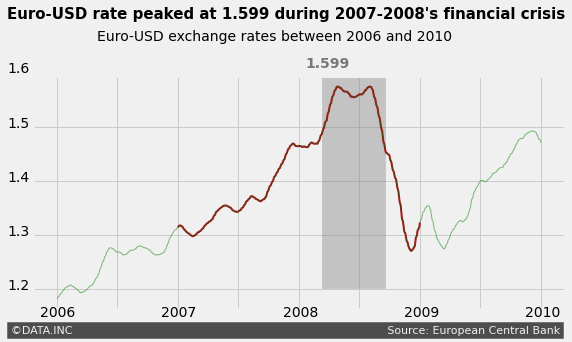

In [26]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline 

# Subset data
finance_2007_2008 = euro_to_dollar[euro_to_dollar['Time'].isin(pd.date_range("2007-01-01", "2008-12-31"))].copy()
finance_2006_2009 = euro_to_dollar[euro_to_dollar['Time'].isin(pd.date_range("2006-01-01", "2009-12-31"))].copy()

### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8.5, 4))

# Showing 2007-2008 data in red and 2006-2009 as grey-green baseline
ax.plot(finance_2007_2008['Time'],finance_2007_2008['rolling_mean_30'],
#        color='#b00b1e', linewidth=1)
       color='#b00b1e', linewidth=2)
ax.plot(finance_2006_2009['Time'],finance_2006_2009['rolling_mean_30'],
       color='green', alpha=0.5,linewidth=1)

ax.grid(which='minor', alpha=0.2)  
ax.set_yticklabels([])                                  
ax.set_xticklabels([])

### Highlihting the peak of the crisis
ax.axvspan(xmin=13950, xmax=14140, ymin=0.09,
           alpha=0.4, color='grey')
ax.text(13900, 1.61, "1.599", 
       weight="bold",alpha=0.5)

# Adding x- and y-tick labels. 
x = 13100
for year in ["2006","2007","2008","2009","2010"]:
    ax.text( x, 1.15, year )
    x += 365
y = 1.2    
for rate in ["1.2","1.3","1.4","1.5","1.6"]:
    ax.text(13000, y, rate )
    y += 0.1

# Adding title, subtitle, signagture  
ax.text(13000, 1.7,
        "Euro-USD rate peaked at 1.599 during 2007-2008's financial crisis",                      
        weight='bold',size=15)
ax.text(13000, 1.66,
        ' '*20 + 'Euro-USD exchange rates between 2006 and 2010')  
ax.text(13010, 1.12,
        '©DATA.INC' + ' '*90 + 'Source: European Central Bank',                           
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=11)    

plt.savefig("story_1_financial_crisis.png",  dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.show()


### Data Story 2: How the euro-dollar rate changed under the last three US presidents 

(George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021))



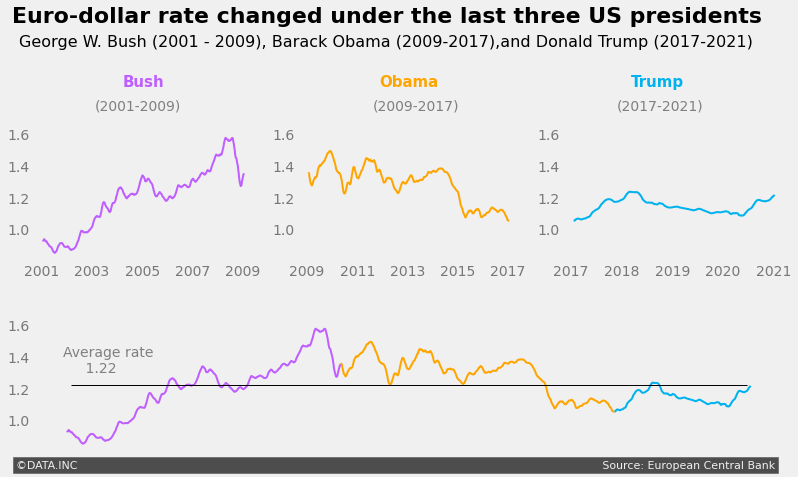

In [27]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline 

# Subset data
bush = euro_to_dollar[euro_to_dollar['Time'].isin(pd.date_range("2001-01-20", "2009-01-19"))].copy()
obama = euro_to_dollar[euro_to_dollar['Time'].isin(pd.date_range("2009-01-20", "2017-01-19"))].copy()
trump= euro_to_dollar[euro_to_dollar['Time'].isin(pd.date_range("2017-01-20", "2021-01-19"))].copy()
bush_obama_trump = euro_to_dollar[euro_to_dollar['Time'].isin(pd.date_range("2001-01-20", "2021-01-19"))].copy()

### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3,ax4]
data = [bush,obama,trump]
color = ["#BF5FFF","#ffa500","#00B2EE"]
year =  [ ["","2001","","2003","","2005","","2007","","2009"],
         ["","2009","","2011","","2013","","2015","","2017"],
         ['2017', '', '2018', '', '2019', '','2020', '', '2021']
        ]

for i in [0,1,2,3]:
    axes[i].grid(False) 
    axes[i].set_ylim(0.8,1.8)
    axes[i].set_yticks([0.8,1.0,1.2,1.4,1.6])   
    axes[i].set_yticklabels(["","1.0","1.2","1.4","1.6"], alpha =0.5)   
    

for i in [0,1,2]:
    axes[i].plot(data[i]['Time'],data[i]['rolling_mean_30'],
        color=color[i], linewidth=2)
    axes[i].set_xticklabels(year[i], alpha =0.5)   

    ax4.plot(data[i]['Time'],data[i]['rolling_mean_30'],
        color=color[i], linewidth=2)

### Ax1: Bush
ax1.text(12500, 1.9,   "Bush", weight='bold',color=color[0],size=15)
ax1.text(12100, 1.75, '(2001-2009)',color='grey')  

### Ax2: obama
ax2.text(15300, 1.9,   "Obama", weight='bold',color=color[1],size=15)
ax2.text(15200, 1.75, '(2009-2017)',color='grey')

### Ax3: Tumpa
ax3.text(17600, 1.9,   "Trump", weight='bold',color=color[2],size=15)
ax3.text(17500, 1.75, '(2017-2021)',color='grey')

### Ax4: bush_obama_trump
ax4.set_xticklabels([])       
averge_rate = bush_obama_trump['rolling_mean_30'].mean()
ax4.axhline(y=averge_rate, xmin=0.05, xmax=0.95,
               linewidth=1, color='black')
ax4.text(11300, 1.3, 'Average rate \n     1.22',color='grey')

# Adding title, subtitle, signagture  
ax1.text(10900, 2.3,
        "Euro-dollar rate changed under the last three US presidents",                      
        weight='bold',size=22)
ax1.text(11000, 2.15,
        'George W. Bush (2001 - 2009), Barack Obama (2009-2017),and Donald Trump (2017-2021)',
        size=16)  
ax4.text(10800, 0.7,
        '©DATA.INC' + ' '*150 + 'Source: European Central Bank',                           
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=11)       
    
plt.savefig("story_2_bush_obama_trump.png", dpi=fig.dpi, bbox_inches='tight', pad_inches=0)
plt.show()

### Data Story 3: How the euro-dollar rate has changed during the coronavirus pandemic.

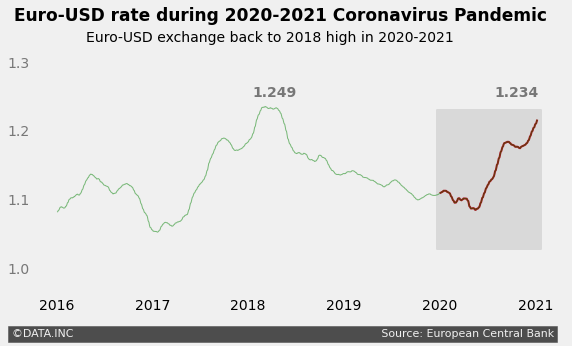

In [28]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline 

# Subset data
pandemic_2020_2021 = euro_to_dollar[euro_to_dollar['Time'].isin(pd.date_range("2020-01-01", "2021-12-31"))].copy()
baseline_2016_2021 = euro_to_dollar[euro_to_dollar['Time'].isin(pd.date_range("2016-01-01", "2021-12-31"))].copy()

### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8.5, 4))

# Showing 2007-2008 data in red and 2006-2009 as grey-green baseline
ax.plot(pandemic_2020_2021['Time'],pandemic_2020_2021['rolling_mean_30'],
       color='#b00b1e', linewidth=2)
ax.plot(baseline_2016_2021['Time'],baseline_2016_2021['rolling_mean_30'],
       color='green', alpha=0.5,linewidth=1)

ax.grid(False)                            
ax.set_yticks([0.96,1.0,1.1,1.2,1.3])   
ax.set_yticklabels(["","1.0","1.1","1.2","1.3"], alpha =0.5)   

### Highlihting the peak of the crisis
ax.axvspan(xmin=18250, xmax=18650, ymin=0.2,ymax =0.8, alpha=0.2, color='grey')

peak2018 = baseline_2016_2021[euro_to_dollar['Time'].isin(pd.date_range("2018-01-01", "2019-01-01"))]['US_dollar'].max()
peak2021 = baseline_2016_2021[euro_to_dollar['Time'].isin(pd.date_range("2020-01-01", "2021-12-31"))]['US_dollar'].max()

ax.text(17550, 1.25, round(peak2018,3), weight="bold",alpha=0.5)
ax.text(18470, 1.25, round(peak2021,3), weight="bold",alpha=0.5)

# Adding title, subtitle, signagture  
ax.text(16640, 1.36,
        "Euro-USD rate during 2020-2021 Coronavirus Pandemic",                      
        weight='bold',size=17)
ax.text(16640, 1.33,
        ' '*16 +  'Euro-USD exchange back to 2018 high in 2020-2021')  
ax.text(16630, 0.9,
        '©DATA.INC' + ' '*88 + 'Source: European Central Bank',                           
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=11)    

plt.savefig("story_3_coronavirus_pandemic.png",  dpi=fig.dpi, bbox_inches='tight', pad_inches=0)
plt.show()

### Conclusion:

In this project, we created a storytelling data visualization using the following workflow:

* We started by exploring and cleaning the data.
* We brainstormed ideas for storytelling data visualizations and chose one.
* We sketched our data visualization using pen and paper.
* We coded the sketched data visualization.
* In the end, we told 3 data stroies from the exchange rate data set